In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\Peter\AppData\Local\Temp\ipykernel_7104\3378361002.py:3: DtypeWarning: Columns (631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Peter\AppData\Local\Temp\ipykernel_7104\3378361002.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


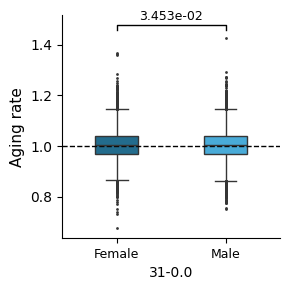

In [ ]:
# Load dataset
file_path = '../data/4.300_all_prot+met+pop+diea+age.csv'
df = pd.read_csv(file_path)

# Convert gender codes (0/1) to text labels for better visualization
df['31-0.0'] = df['31-0.0'].map({0: 'Female', 1: 'Male'})

# Split data by gender for statistical comparison
female_data = df[df['31-0.0'] == 'Female']['aging_rate']
male_data = df[df['31-0.0'] == 'Male']['aging_rate']

# Calculate statistical significance using independent t-test
stat, p_value = ttest_ind(female_data, male_data)
p_text = f'{p_value:.3e}'

# Initialize figure with specified dimensions
fig, ax = plt.subplots(figsize=(3, 3))

# Configure outlier appearance
flierprops = dict(marker='o', color='black', markersize=1)

# Create boxplot comparing aging rates by gender
sns.boxplot(
    x='31-0.0', y='aging_rate', data=df, 
    palette=['#12729E', '#31B4F0'],
    width=0.4, ax=ax, linewidth=1,
    flierprops=flierprops
)

# Add significance annotation with p-value
x1, x2 = 0, 1  # X-positions for Female and Male boxes
y, h = max(df['aging_rate']) + 0.03, 0.02  # Y-position and height for annotation
# Draw significance bracket
ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], color='black', linewidth=1)
# Add p-value text
ax.text((x1 + x2) / 2, y + h + 0.01, p_text, ha='center', va='bottom', fontsize=9)

# Adjust x-axis limits to reduce empty space
ax.set_xlim(-0.5, 1.5)

# Add reference line at normal aging rate (y=1.0)
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1)

# Configure x-axis tick labels
plt.tick_params(axis='x', labelcolor='black', labelsize=9)

# Remove top and right spines for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis label
ax.set_ylabel('Aging rate', fontsize=11)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()